#### psymukb analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

disease_list = ['Autism_ASD','Developmental_Delay_DD','Fetal_non-Preterm_birth_non-PTB','Fetal_preterm_birth_PTB','Mix_Autism_or_Schizophrenia','Sibling_Control']
# 1000,24,863,497,198,1000
tissue_list = ['hippocampus','cerebellum','prefrontal_cortex','temporal_lobe','substantia_nigra']

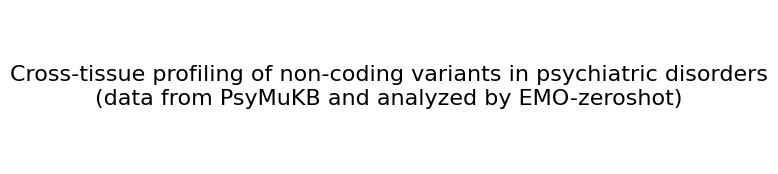

In [2]:
plt.figure(figsize=(8, 2)) 

text = "Cross-tissue profiling of non-coding variants in psychiatric disorders\n(data from PsyMuKB and analyzed by EMO-zeroshot)"
plt.text(0.5, 0.5, text,
         fontsize=16, ha='center', va='center')

plt.axis('off')
plt.savefig("images/0title.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

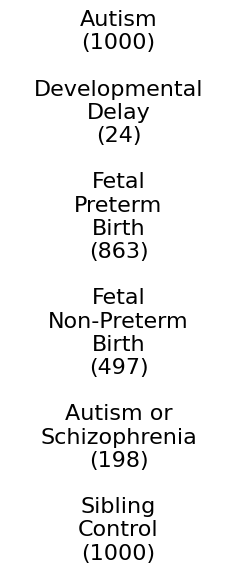

In [3]:
plt.figure(figsize=(2.8, 4)) 

text = "Autism\n(1000)\n\nDevelopmental\nDelay\n(24)\n\nFetal\nPreterm\nBirth\n(863)\n\nFetal\nNon-Preterm\nBirth\n(497)\n\nAutism or\nSchizophrenia\n(198)\n\nSibling\nControl\n(1000)"
plt.text(0.5, 0.5, text,
         fontsize=16, ha='center', va='center')

plt.axis('off')
plt.savefig("images/0text_image.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

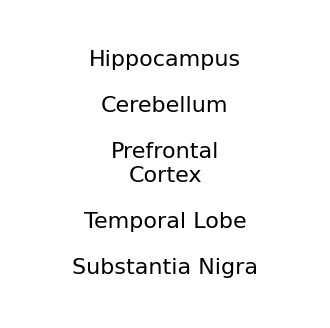

In [4]:
plt.figure(figsize=(4, 4)) 

text = "Hippocampus\n\nCerebellum\n\nPrefrontal\nCortex\n\nTemporal Lobe\n\nSubstantia Nigra"
plt.text(0.5, 0.5, text,
         fontsize=16, ha='center', va='center')

plt.axis('off')
plt.savefig("images/1text_image.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

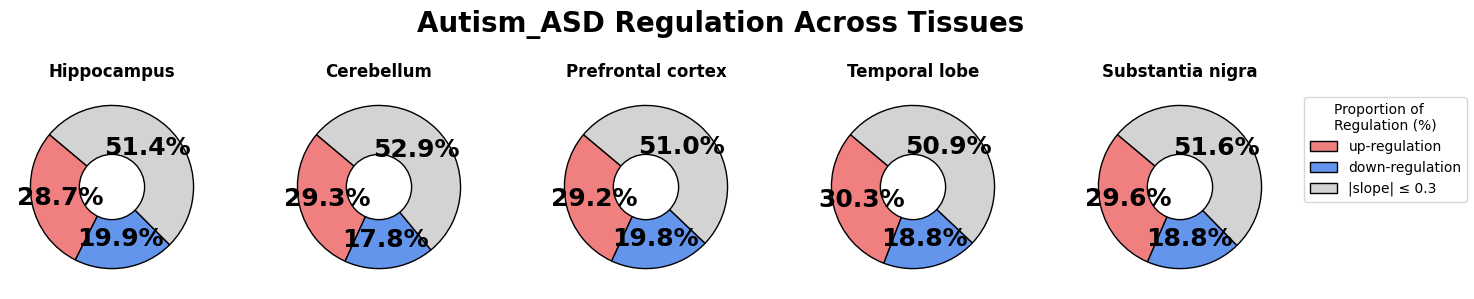

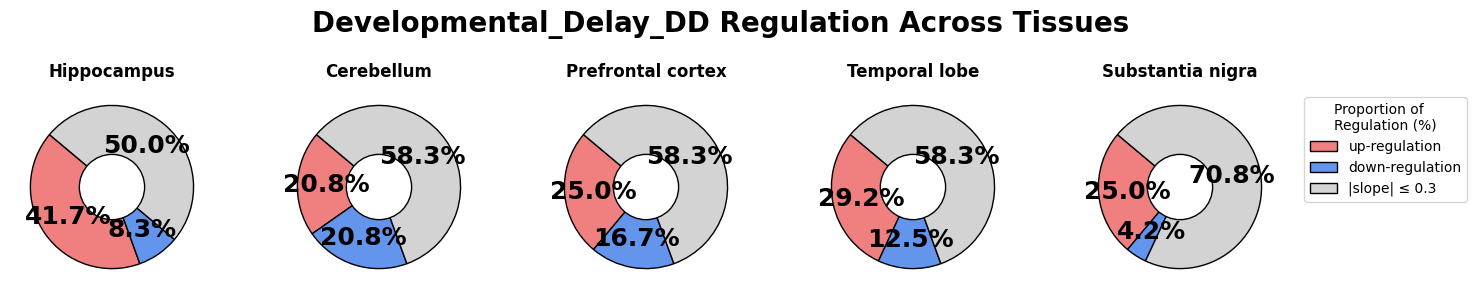

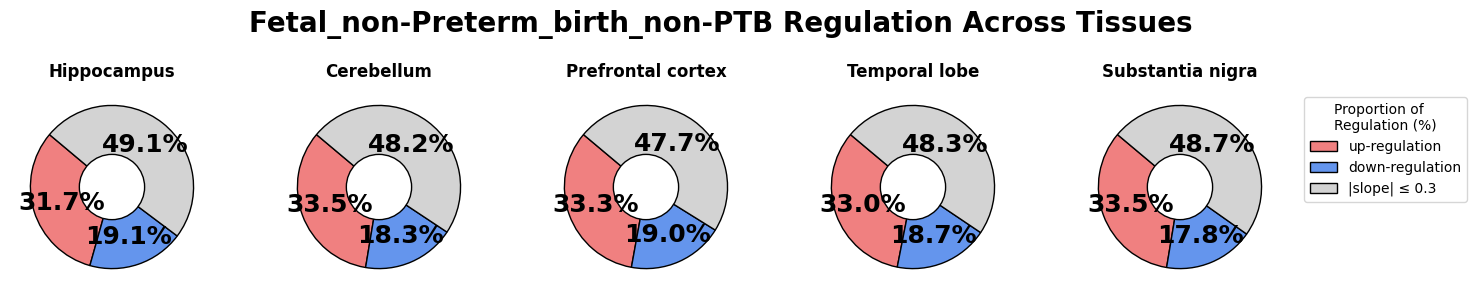

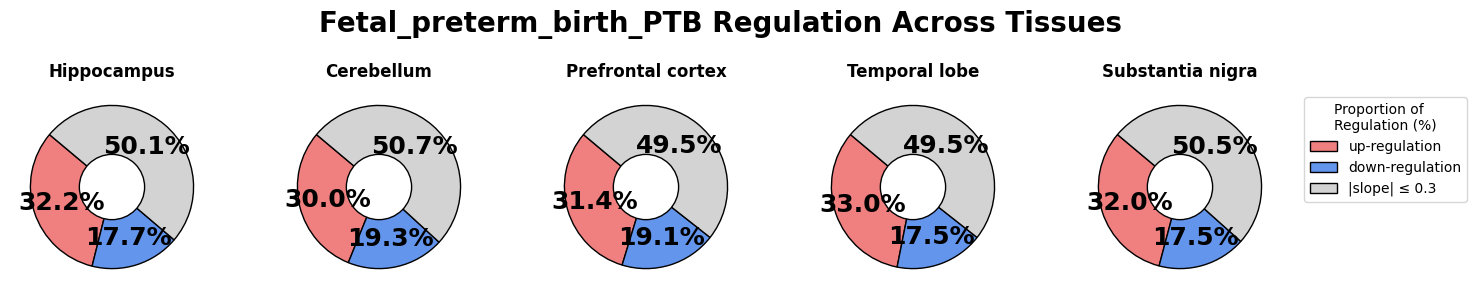

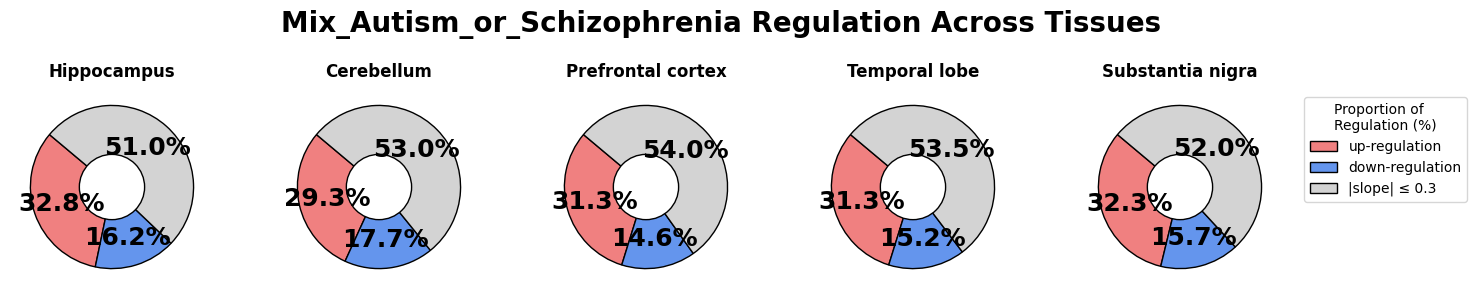

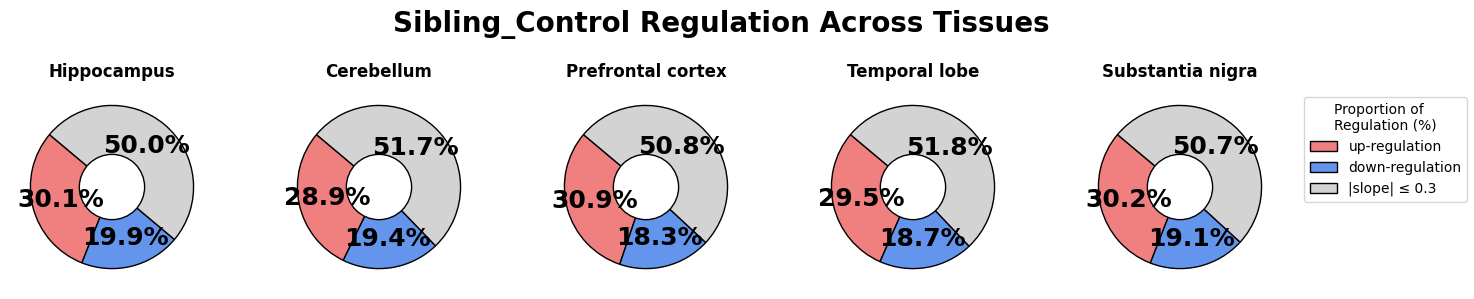

In [5]:
# colors = ["red", "blue", "gray"]
colors = ["#F08080", "#6495ED", "#D3D3D3"]
labels = ["up-regulation", "down-regulation", "|slope| ≤ 0.3"]

for disease in disease_list:
    data = pd.read_csv('datasets/' + disease + '_pred_final.csv')
    fig, axes = plt.subplots(1, len(tissue_list), figsize=(3 * len(tissue_list), 3))
    if len(tissue_list) == 1:
        axes = [axes]

    for i, tissue in enumerate(tissue_list):
        slope_col = f"{tissue}_slope"
        sign_col = f"{tissue}_sign"
        data[slope_col] = data[slope_col] * data[sign_col].map({'Up-regulation': 1, 'Down-regulation': -1})

        up = (data[slope_col] > 0.3).sum()
        down = (data[slope_col] < -0.3).sum()
        weak = ((data[slope_col] >= -0.3) & (data[slope_col] <= 0.3)).sum()
        values = [up, down, weak]

        ax = axes[i]
        wedges, texts, autotexts = ax.pie(
            values, labels=None, colors=colors, autopct="%1.1f%%",
            startangle=140, pctdistance=0.65,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        )
        center_circle = plt.Circle((0, 0), 0.4, fc='white', edgecolor='black', linewidth=1)
        ax.add_artist(center_circle)

        for autotext in autotexts:
            autotext.set_fontsize(18)
            autotext.set_weight("bold")

        ax.set_title(f"{tissue.replace('_', ' ').capitalize()}", fontsize=12, fontweight='bold')

    fig.legend(wedges, labels, title="Proportion of\nRegulation (%)", loc='center right', fontsize=10)
    plt.suptitle(f"{disease} Regulation Across Tissues", fontsize=20, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 0.9, 0.95])

    plt.savefig(f"images/{disease}_combined_regulation_donut.png", dpi=600)
    plt.show()
    plt.close()

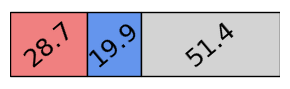

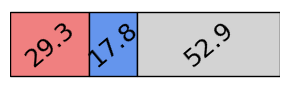

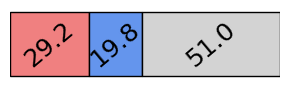

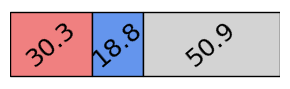

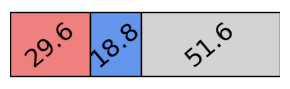

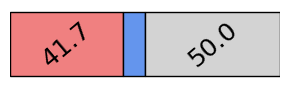

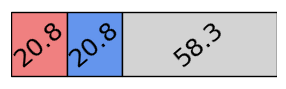

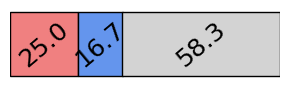

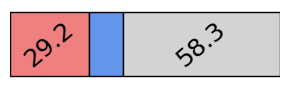

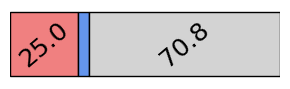

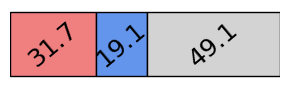

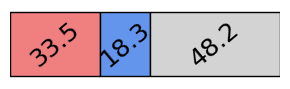

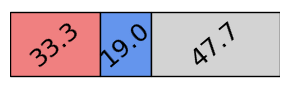

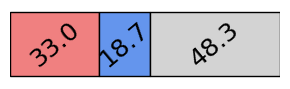

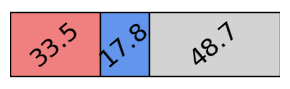

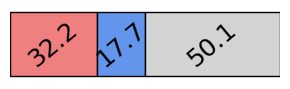

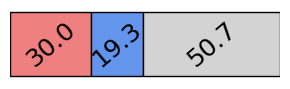

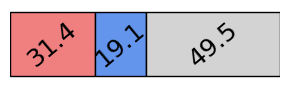

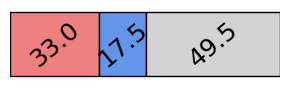

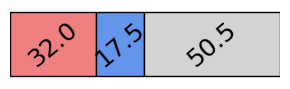

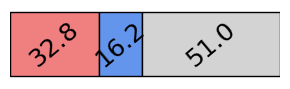

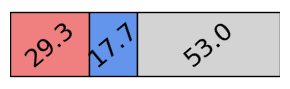

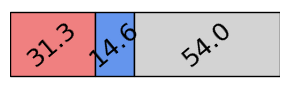

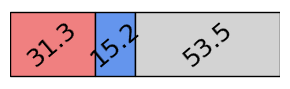

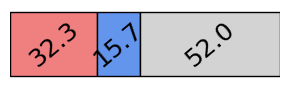

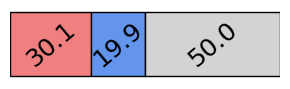

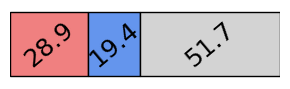

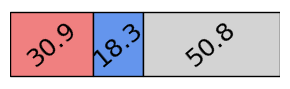

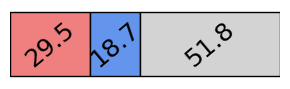

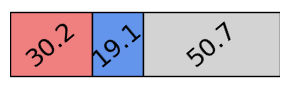

In [6]:
# colors = ["red", "blue", "gray"]
colors = ["#F08080", "#6495ED", "#D3D3D3"]
labels = ["up-regulation", "down-regulation", "weakly affected"]

for disease in disease_list:
    data = pd.read_csv('datasets/' + disease + '_pred_final.csv')
    for tissue in tissue_list:
        slope_col = f"{tissue}_slope"
        sign_col = f"{tissue}_sign"
        data[slope_col] = data[slope_col] * data[sign_col].map({'Up-regulation': 1, 'Down-regulation': -1})

        up = (data[slope_col] > 0.3).sum()
        down = (data[slope_col] < -0.3).sum()
        weak = ((data[slope_col] >= -0.3) & (data[slope_col] <= 0.3)).sum()

        total = up + down + weak

        proportions = [up / total, down / total, weak / total]

        fig, ax = plt.subplots(figsize=(3, 1))
        left = 0
        for i in range(3):
            ax.barh(tissue, proportions[i], left=left, color=colors[i], edgecolor='black')
            
            if proportions[i] > 0.14:
                ax.text(left + proportions[i]/2, 0, f"{proportions[i]*100:.1f}", va='center', ha='center', fontsize=18,rotation=40)
            left += proportions[i]

        ax.set_xlim(0, 1)
        ax.axis('off')
        #ax.set_xlabel('Proportion')
        #ax.set_title(f"{disease} - {tissue.replace('_', ' ').capitalize()} Regulation", fontsize=12)
        ax.get_yaxis().set_visible(False)
        #ax.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)
        plt.tight_layout()
        plt.savefig(f"images/{disease}_{tissue}_regulation_bar.png", dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()

In [20]:
# bootstrap test
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency, fisher_exact

disease_list = ['Autism_ASD','Developmental_Delay_DD','Fetal_non-Preterm_birth_non-PTB','Fetal_preterm_birth_PTB','Mix_Autism_or_Schizophrenia','Sibling_Control']
# 1000,24,863,497,198,1000
tissue_list = ['hippocampus','cerebellum','prefrontal_cortex','temporal_lobe','substantia_nigra']

disease1 = 'Developmental_Delay_DD'
disease2 = 'Autism_ASD'


data_dd = pd.read_csv('datasets/' + disease1 + '_pred_final.csv')
for tissue in tissue_list:
    slope_col = f"{tissue}_slope"
    sign_col = f"{tissue}_sign"
    data_dd[slope_col] = data_dd[slope_col] * data_dd[sign_col].map({'Up-regulation': 1, 'Down-regulation': -1})

data_sibling = pd.read_csv('datasets/' + disease1 + '_pred_final.csv')
for tissue in tissue_list:
    slope_col = f"{tissue}_slope"
    sign_col = f"{tissue}_sign"
    data_sibling[slope_col] = data_sibling[slope_col] * data_sibling[sign_col].map({'Up-regulation': 1, 'Down-regulation': -1})
    
p_values = {}

for tissue in tissue_list:
    slope_col = f"{tissue}_slope"
    
    def categorize(x):
        if x > 0.3:
            return 'up'
        elif x < -0.3:
            return 'down'
        else:
            return 'weak'
    
    cat1 = data_dd[slope_col].apply(categorize).value_counts()
    cat2 = data_sibling[slope_col].apply(categorize).value_counts()
    
    # 统一类别顺序，防止某类缺失时报错
    categories = ['up', 'down', 'weak']
    row1 = [cat1.get(c, 0) for c in categories]
    row2 = [cat2.get(c, 0) for c in categories]

    contingency_table = [row1, row2]
    
    # 使用chi-square检验（如果某个类别特别稀少，建议用Fisher精确检验）
    chi2, p_val, _, _ = chi2_contingency(contingency_table)
    p_values[tissue] = p_val

# 打印p值
for tissue, p_val in p_values.items():
    print(f"{tissue}: Chi-square p-value = {p_val:.5f}")

hippocampus: Chi-square p-value = 1.00000
cerebellum: Chi-square p-value = 1.00000
prefrontal_cortex: Chi-square p-value = 1.00000
temporal_lobe: Chi-square p-value = 1.00000
substantia_nigra: Chi-square p-value = 1.00000
